## Logistic Regression With Tensorflow

In this notebook we shall build a model to train Image Classsification on MNIST dataset. TF.keras provides the dataset for us

In [49]:
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST data is a collection of hand-written digits that contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 255. 

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
y_train.shape

(60000,)

In [53]:
X_test.shape

(10000, 28, 28)

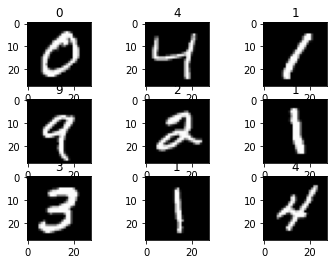

In [54]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(y_train[i])

In [55]:
X_train = X_train/255.0
X_test = X_test/255.0

This is how our data looks like

In [56]:
print(X_train[2])  #ranges from 0 to 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [57]:
X_train[0].shape

(28, 28)

#### Scaling the Dataset

While working with images we scale the input data by dividing the input data by /255.0. But before that we have to flatten the shape of the image i.e.,  each image will be converted to float32, normalized to [0, 1] and flattened to a 1-D array of 784 features (28*28).

In [88]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=10,activation="softmax"))

model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [89]:
history = model.fit(X_train,y_train,epochs=30,batch_size =30)

Epoch 1/30
2000/2000 [==============================] - 2s 974us/step - loss: 0.7650 - accuracy: 0.8177
Epoch 2/30
2000/2000 [==============================] - 2s 932us/step - loss: 0.4495 - accuracy: 0.8813
Epoch 3/30
2000/2000 [==============================] - 2s 982us/step - loss: 0.3983 - accuracy: 0.8921
Epoch 4/30
2000/2000 [==============================] - 2s 974us/step - loss: 0.3727 - accuracy: 0.8977
Epoch 5/30
2000/2000 [==============================] - 2s 990us/step - loss: 0.3565 - accuracy: 0.9009
Epoch 6/30
2000/2000 [==============================] - 2s 998us/step - loss: 0.3448 - accuracy: 0.9038
Epoch 7/30
2000/2000 [==============================] - 2s 939us/step - loss: 0.3361 - accuracy: 0.9058
Epoch 8/30
2000/2000 [==============================] - 2s 977us/step - loss: 0.3291 - accuracy: 0.9079
Epoch 9/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.9098
Epoch 10/30
2000/2000 [==============================] - 2s 978us/

In [90]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

313/313 - 0s - loss: 0.2781 - accuracy: 0.9217 - 333ms/epoch - 1ms/step


In [91]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=2)

1875/1875 - 1s - loss: 0.2803 - accuracy: 0.9223 - 1s/epoch - 707us/step


In [92]:
print(dir(history))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks', '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


In [93]:
epochs = history.epoch
history_df = pd.DataFrame(history.history)
history_df.head(3)
accuracy = history_df['accuracy']
loss = history_df['loss']

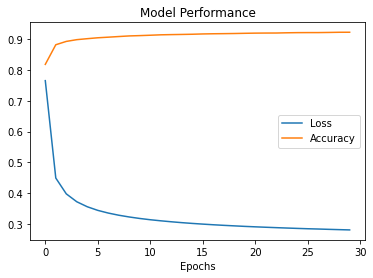

In [94]:
plt.plot(epochs,loss,label="Loss")
plt.plot(epochs,accuracy,label="Accuracy")
plt.xlabel("Epochs")
plt.title("Model Performance")
plt.legend()

### Early Stopping

Now consider you have 100 epochs running. But at one certain point the metrics and loss stops improving and it keeps returning similar result. During that time it is best practice to stop.

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train,y_train,epochs=30,batch_size =30,callbacks=[callback])

In [95]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

313/313 - 0s - loss: 0.2781 - accuracy: 0.9217 - 233ms/epoch - 745us/step


In [96]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=2)

1875/1875 - 1s - loss: 0.2803 - accuracy: 0.9223 - 1s/epoch - 747us/step


In [97]:
prediction = model.predict(X_test)

313/313 [==============================] - 0s 667us/step


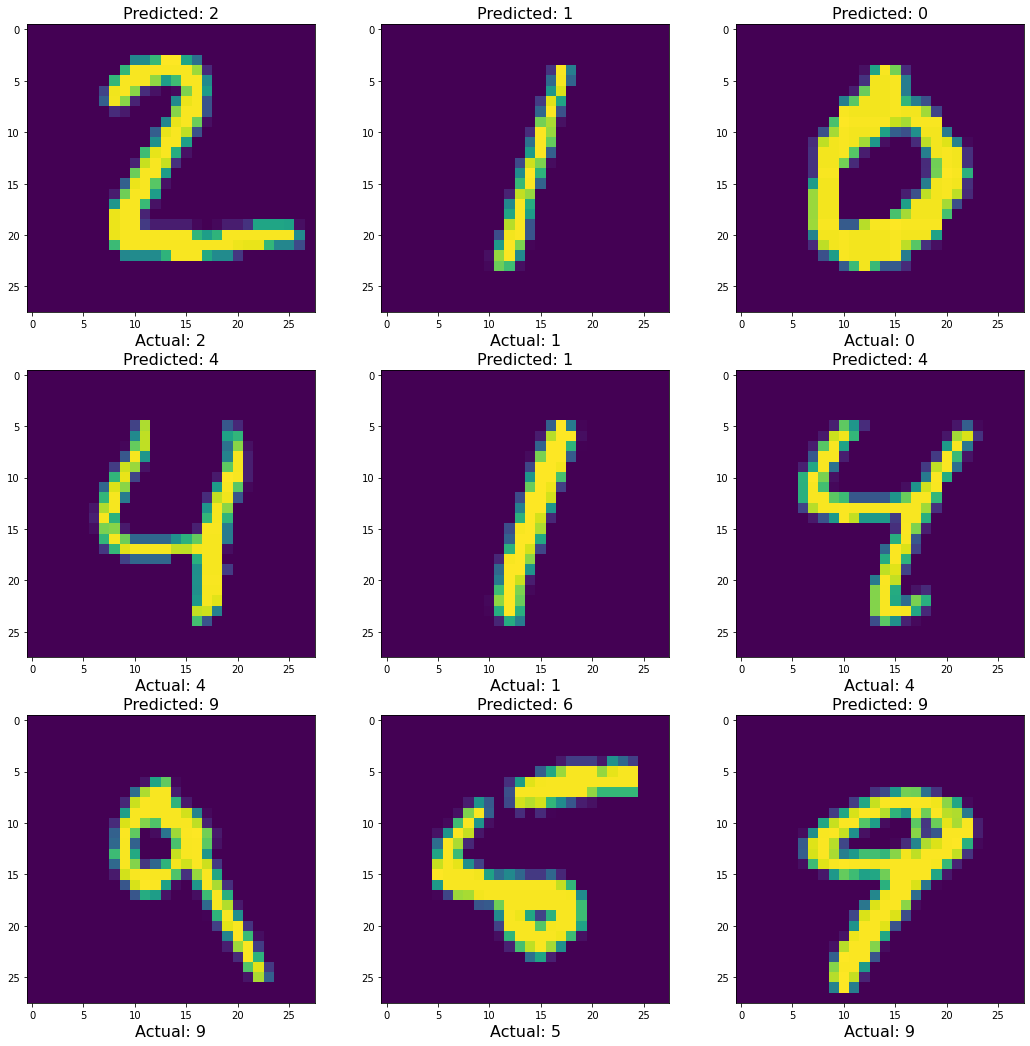

In [98]:
plt.figure(figsize=(18,18))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {np.argmax(prediction[i])}",fontsize=16)
    plt.xlabel(f"Actual: {y_test[i]}",fontsize=16)

Our model training and testing have accuracy of nearly 93% which is really very good. And we have verified it on actual test vectors.  

Other Metrics to check out instead of Accuracy Score are Precision and Recall. Let us look on precision and recall as metrics

In [99]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(units=10,activation="softmax"))

model1.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=keras.metrics.Precision(name='precision'))

In [100]:
history1 = model1.fit(X_train,y_train,epochs=30,batch_size =30)

Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 894, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 501, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/metrics/metrics.py", line 818, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/metrics_utils.py", line 619, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (30, 10) and (30, 1) are incompatible
